In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle

## Generate ROC Plots from Fig.4

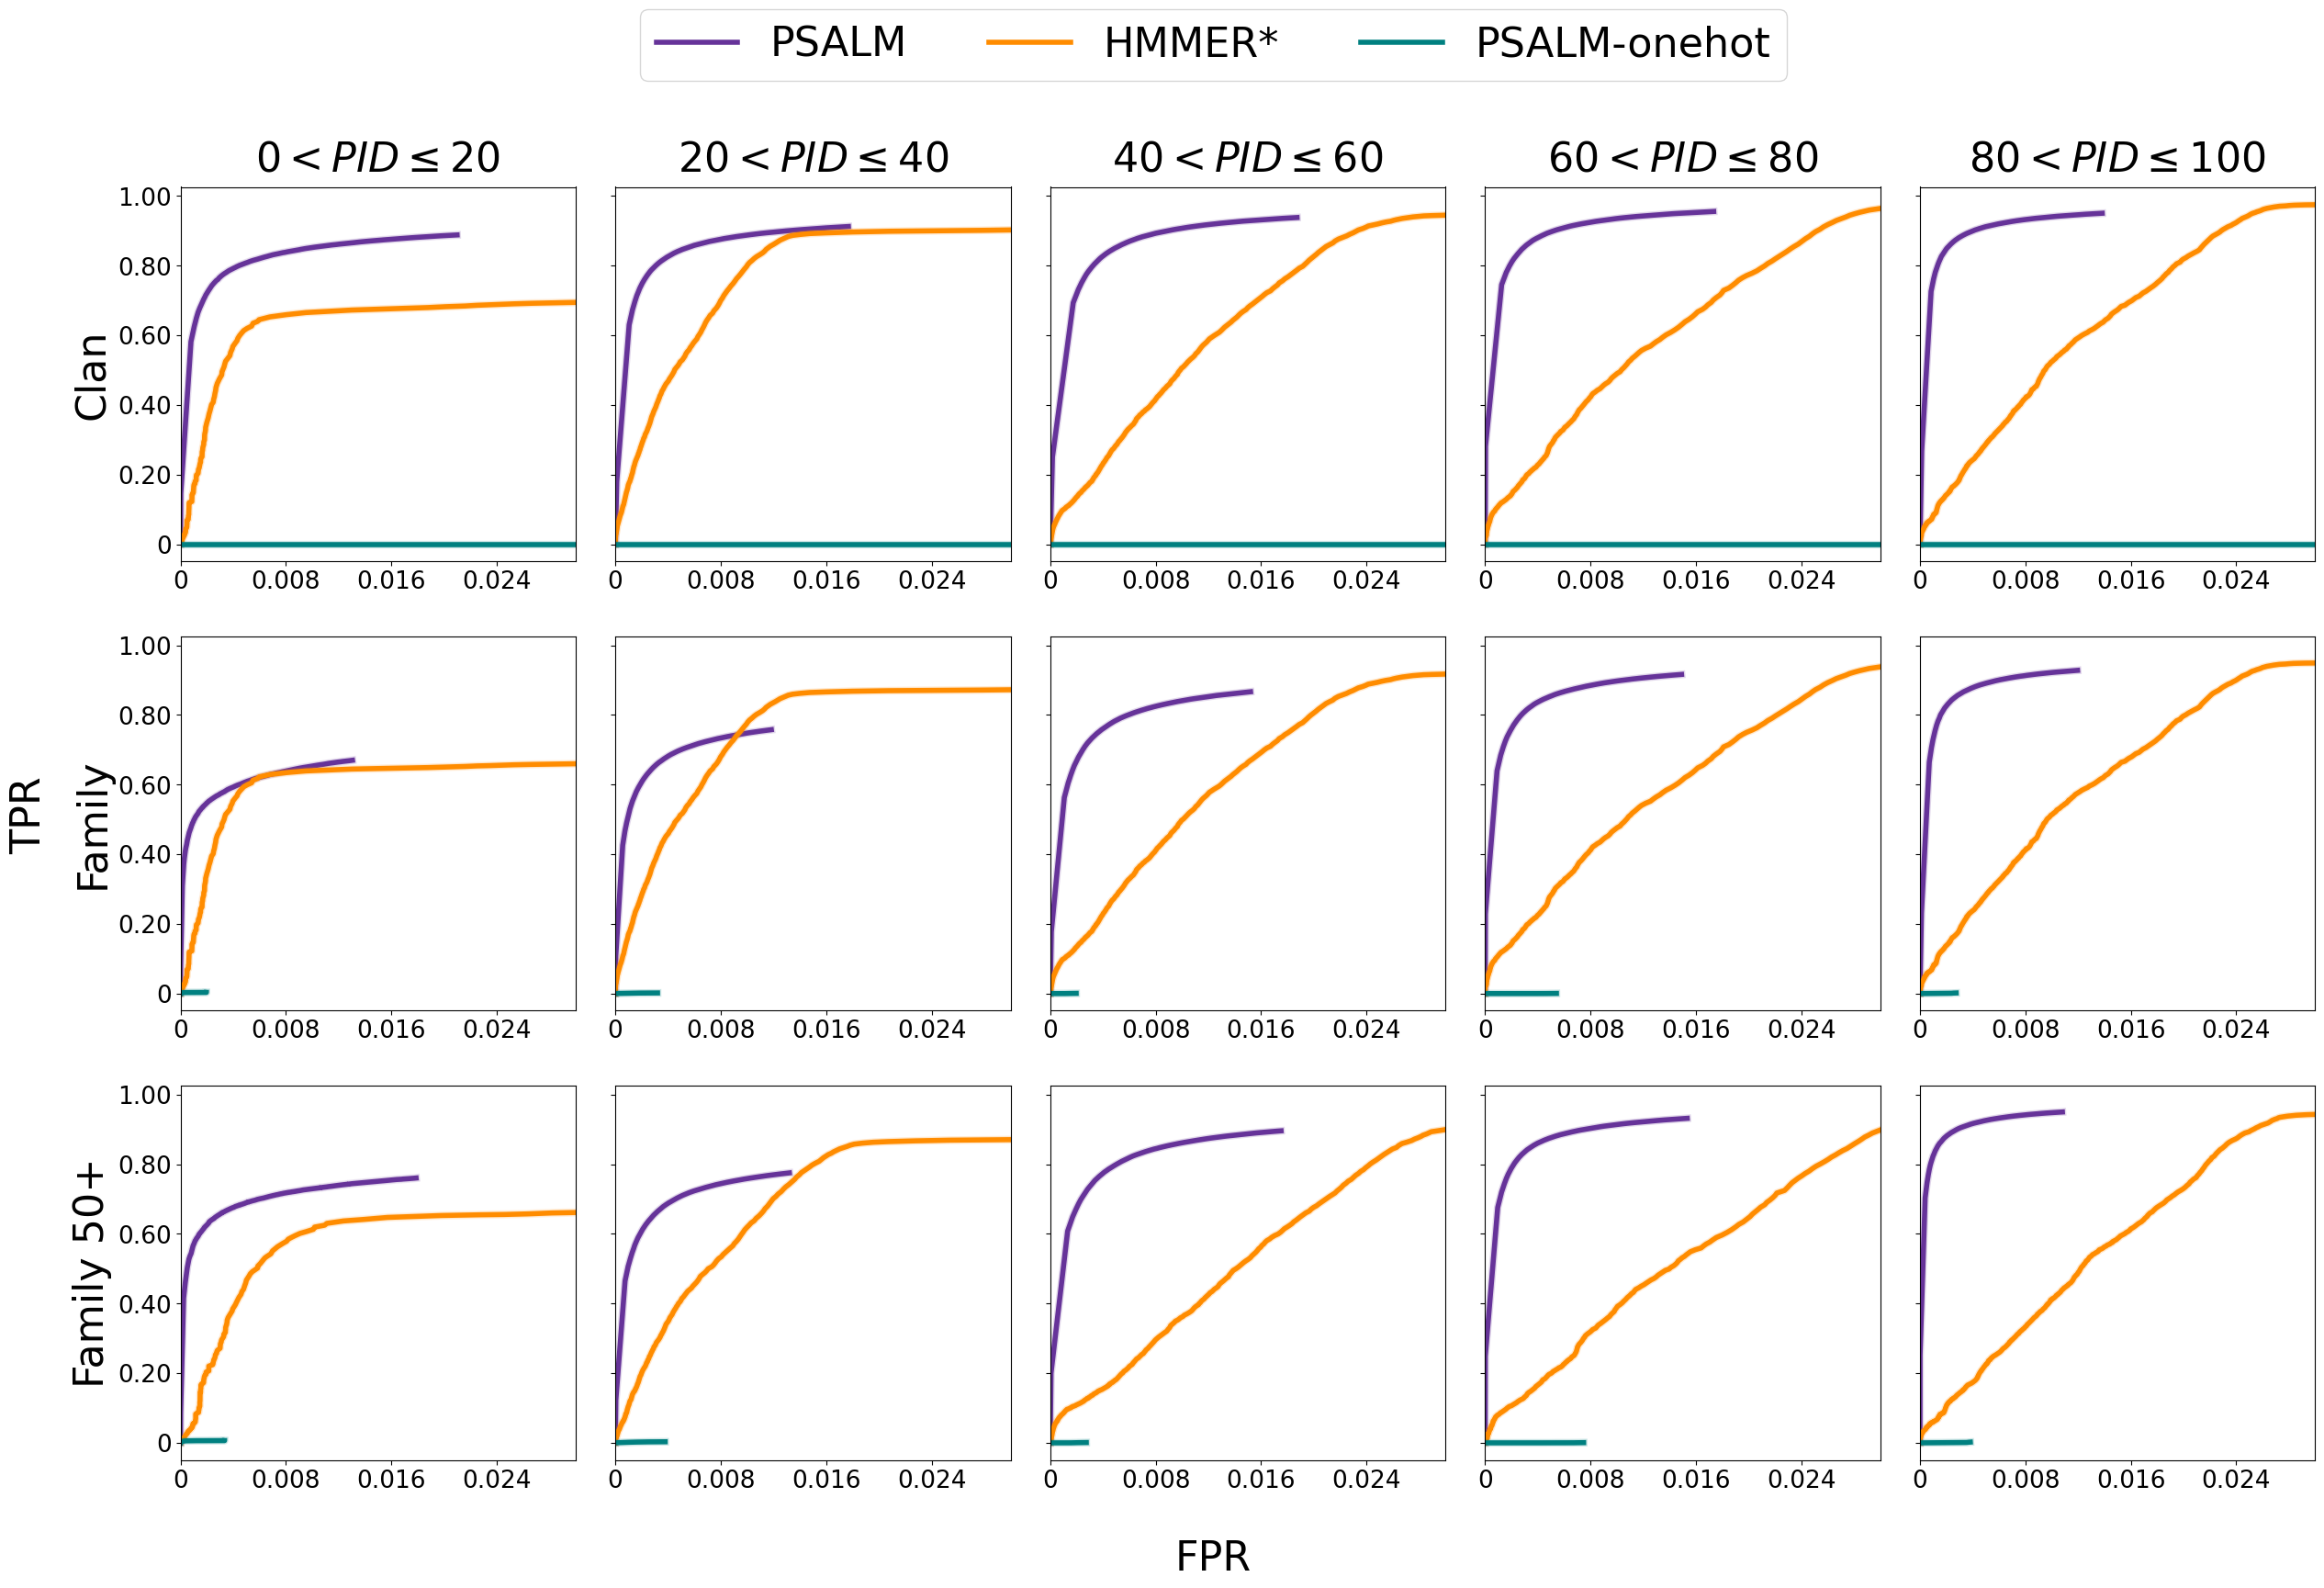

In [7]:
from matplotlib.ticker import FuncFormatter


# Function to format y-axis ticks
def format_y_ticks(value, tick_number):
    if value == 0:
        return int(value)
    else:
        return f"{value:.2f}"

# Function to format x-axis ticks
def format_x_ticks(value, tick_number):
    if value == 0:
        return int(value)
    else:
        return f"{value:.3f}"

# Create FuncFormatter objects
y_formatter = FuncFormatter(format_y_ticks)
x_formatter = FuncFormatter(format_x_ticks)


splits = ['20_nu','40','60','80','100']
num_seen = [20, 50]
methods = ['PSALM', 'HMMER*', 'PSALM-onehot']
colors = {'PSALM': 'rebeccapurple', 'HMMER*': 'darkorange', 'PSALM-onehot': 'teal'}

fig, axs = plt.subplots(3, 5, figsize=(30, 18), sharey=True)

plt.subplots_adjust(wspace=0.1)  # decrease horizontal space between plots

lines = []  # for storing Line2D objects for the legend

# Plot clan ROC curves
for i, split in enumerate(splits):
    with open(f"clan_rocs_{split}_{num_seen[0]}.pkl", "rb") as f:
        roc_values = pickle.load(f)
    max_x = 0
    for j, roc_value in enumerate(roc_values):
        tpr_values, fpr_values, tpr_cis = zip(*roc_value)
        
        # Plot ROC curve with increased line thickness
        # Plot confidence intervals
        color = colors[methods[j]]
        axs[0, i].fill_between(fpr_values, [tpr - ci for tpr, ci in zip(tpr_values, tpr_cis)], [tpr + ci for tpr, ci in zip(tpr_values, tpr_cis)], color=color, alpha=0.1)
        # Plot boundary lines with increased thickness
        axs[0, i].plot(fpr_values, [tpr - ci for tpr, ci in zip(tpr_values, tpr_cis)], color=color, linewidth=6.0, alpha=0.1)
        axs[0, i].plot(fpr_values, [tpr + ci for tpr, ci in zip(tpr_values, tpr_cis)], color=color, linewidth=6.0, alpha=0.1)
        line, = axs[0, i].plot(fpr_values, tpr_values, label=f"{methods[j]} ROC curve", linewidth=4.0, color=color)
        lines.append(line)
        
        # Update max_x
        if methods[j] in ['PSALM', 'HMMER*']:
            max_x = max(max_x, max(fpr_values))

    axs[0, i].xaxis.set_major_locator(ticker.MaxNLocator(4))
    axs[0, i].xaxis.set_major_formatter(x_formatter)
    axs[0, i].yaxis.set_major_formatter(y_formatter)
    axs[0, i].set_xlim([0, 0.03])

    # Add top label with updated titles
    titles = ['$0 < PID \leq 20$', '$20 < PID \leq 40$', '$40 < PID \leq 60$', '$60 < PID \leq 80$', '$80 < PID \leq 100$']
    axs[0, i].text(0.5, 1.02, titles[i], transform=axs[0, i].transAxes, ha='center', va='bottom', fontsize=32)

# Set y labels for each row
axs[0, 0].set_ylabel("Clan", fontsize=32)

# Plot family ROC curves for num_seen = 20 and num_seen = 50
for k in range(2):
    for i, split in enumerate(splits):
        with open(f"fam_rocs_{split}_{num_seen[k]}.pkl", "rb") as f:
            roc_values = pickle.load(f)
        max_x = 0
        for j, roc_value in enumerate(roc_values):
            tpr_values, fpr_values, tpr_cis = zip(*roc_value)
            color = colors[methods[j]]
            axs[k+1, i].fill_between(fpr_values, [tpr - ci for tpr, ci in zip(tpr_values, tpr_cis)], [tpr + ci for tpr, ci in zip(tpr_values, tpr_cis)], color=color, alpha=0.1)
            # Plot boundary lines with increased thickness
            axs[k+1, i].plot(fpr_values, [tpr - ci for tpr, ci in zip(tpr_values, tpr_cis)], color=color, linewidth=6.0, alpha=0.1)
            axs[k+1, i].plot(fpr_values, [tpr + ci for tpr, ci in zip(tpr_values, tpr_cis)], color=color, linewidth=6.0, alpha=0.1)
            line, = axs[k+1, i].plot(fpr_values, tpr_values, label=f"{methods[j]} ROC curve", linewidth=4.0, color=color)
            lines.append(line)

            lines.append(line)
            
            # Update max_x
            if methods[j] in ['PSALM', 'HMMER*']:
                max_x = max(max_x, max(fpr_values))

        axs[k+1, i].xaxis.set_major_locator(ticker.MaxNLocator(4))
        axs[k+1, i].xaxis.set_major_formatter(x_formatter)
        axs[k+1, i].yaxis.set_major_formatter(y_formatter)
        axs[k+1, i].set_xlim([0, 0.03])

# Set y labels for each row
axs[1, 0].set_ylabel("Family", fontsize=32)

axs[2, 0].set_ylabel("Family 50+", fontsize=32)

# Double the font size of the x and y ticks
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=19)

# Create a single legend for the figure
fig.legend(lines[:3], methods, loc="upper center", bbox_to_anchor=(0.5, 1.0), ncol=3, prop={'size': 32})

# Add shared x and y labels
fig.text(0.5, 0.05, 'FPR', ha='center', va='center', fontsize=32)
fig.text(0.07, 0.5, 'TPR', ha='center', va='center', rotation='vertical', fontsize=32)

plt.show()